# Feedforward Neural Networks (pt. 1)#
<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png" />

In a "multidimensional" space (like the 2-D space of the fake data we generated in Julia, or the larger space where the Iowa University Musical Instrument Samples live), one can find relationships between datapoints based on how close they are to each other. That is what the KNN algorithm did. 

However, one can also find relationships between these multidimensional datapoints/vectors using the mathematical operation known as the [inner product](https://www.mathsisfun.com/algebra/vectors-dot-product.html) [(see also the wikipedia article)](https://en.wikipedia.org/wiki/Dot_product). 

The picture bellow will help provide some intution:

<img src="https://www.mathsisfun.com/algebra/images/dot-product-ex1.gif"/>

The picture shows two $\mathbf{R^{1x2}}$ vectors: $$a = [-6, 8]$$ $$b = [5, 12]$$

The inner product of these two vectors would be: $$a ~ b^T = (-6)(5) + (8)(12) = 66$$

You can think of this value of $66$ as a score of the similarity between these two vectors. 

Now imagine that $a$ and $b$ were completely overlapping each other: $$$$$$a = [5, 12]$$ $$b = [5, 12]$$

The inner product of these two vectors would be: $$a ~ b^T = (5)(5) + (12)(12) = 169$$

When the two vertors perfectly overlap, you get a higher score, because they are "more similar", if not equal. 

Hence, this would be another way of telling whether two vectors in a high-dimensional space are similar to each other. 

So, imagine you have a dataset that looks like this one we used before:
<img src="fake_data.png" style="width: 360px"/>
You can imagine that, for each of the three colors of data, there is a vector that maximizes the inner product between itself and the majority (or all) of the datapoints of a given color. 

This vector would be an "average" or "template" approximation of all the datapoints sharing a common color.

So, let's think a bit more about the example data we just saw. 

There are three different colors, and each datapoint if two dimensional. 

This indicates that, using a training set, we could identify three $\mathbf{R^{2x1}}$ "average" or "template" vectors, one for each color.

After idetifying those, we can use them to identify the identify of new and unlabeled datapoints in the two-dimensional plane using a simple inner-product operation.

Identifying the identity of a novel unlabeled datapoint would be as follows:

1. Assume we have "template" vectors $r$, $b$, and $g$ $\in \mathbf{R^{2x1}}$, one for each color of data. We also have an unknown datapoint $u \in \mathbf{R^{1x2}}$. 

2. To do everything in a single operation, concatenate vectors $r$, $b$, and $g$ next to each other, to obtain matrix $W \in \mathbf{R^{2x3}}$.

3. Find the inner product $u ~W$, to obtain vector $s \in \mathbf{R^{1x3}}$, which contains the "score" of similarity between vector $u$ and each of the color vectors. 

4. Find the color that received the highest score, and voila!, we have identified the identity of unknown vector $u$.

You can imagine that, in practice, data can be so high-dimensional and complex, that finding the ideal "template" vectors is extremely difficult. 

Rule of thumb: the less data you have, the more difficult it is to find them. Why?

Here is where Neural Networks come to save the day. In a nutshell, Neural Networks find the "template" vectors using the labeled training data that you give them. 

To better unsderstand the problem, think about the $W \in \mathbf{R^{2x3}}$ matrix as parameters of the mathematical function $$y ~= ~u ~W$$

Where $u \in \mathbf{R^{1x2}}$ is an unknown datapoint, and the vector $y \in \mathbf{R^{1x3}}$ contains the "score" of similarity between vector $u$ and each of the color vectors. 

Now, instead of $u$, let's use a labeled datapoint $x \in \mathbf{R^{1x2}}$. Hence, we can make the mathematical function not just a function, but an "objective". What would the objective be?

We can say that the objective is to make the score for the true color of $x$ to be as high as possibe 

$J = \text{Maximize} \{\hat{y}_{correct}\}$

Where $\hat{y}_{correct} \in \hat{y}$

Thankfully, this is a mathematical function and, assuming it is differentiable, we can take the derivative of the objective w.r.t the parameters $W$ and "ascend" to a higher score for the correct label. 

Hence, we have:

$\frac{\partial J}{\partial W}$

From here on, we use the chain rule to expand this expression into:

$\frac{\partial J}{\partial W} ~= \big(~\frac{\partial \hat{y}}{\partial W}\big)^T ~\frac{\partial J}{\partial \hat{y}} $

Since the objective depends only on $\hat{y}_{correct}$ (i.e. we only care about the score contained in $\hat{y}_{correct}$), the derivative of $\frac{\partial J}{\partial \hat{y}} = $ ?


The derivative of $\frac{\partial J}{\partial \hat{y}} = e_{correct}$

where $e_{correct}$ is a "one-hot" vector in $\mathbf{R^{1x3}}$. This means that all its entries are zero, except at the index that contained the score for the correct label in $\hat{y}$, where it has a value of one.

Hence, our expression is:

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial \hat{y}}{\partial W}\big)^T ~e_{correct} ~= ~\big(\frac{\partial xW}{\partial W}\big)^T ~e_{correct}  ~= ~x^T~e_{correct}$

And an update step in the direction that maximizes the value of the objective function would be:

$W := ~W + ~\alpha~x^T~e_{correct}$

Where $\alpha$ is a tunable free parameter that would allow you to decide how much you want $\frac{\partial J}{\partial W}$ to affect your $W$.

Intuitively, what is going on here?

Discuss in a small group and prepare to share your thoughts with the class.

Now let's prove that all the math we just did can actually help a model maximize the score for the correct label of a datapoint.

To do this, you will have to generate synthetic/fake data. This time, let's make our data be completely full of random numbers in the range from $0$ to $1$ (hint: you'll have to use the `rand` function). Let the parameters for data generation be the number of datapoints `N`, the dimensionality of your data `D`, and the number of classes `C`. Randomly assign labels to your datapoints. Store everything in a variable called `data` with dimensions `[N x (D+1)]`, where the rightmost column contains the labels for each the datapoints contained in each row. 

In [154]:
N = 1000;D = 2;C = 3; # number of classes


In [114]:
# N = 1000;
# D = 5; 
# C = 3;

srand(0);

data = rand(N, D);
labels = floor(Int,rand(1:C, N));
# labels[1:floor(Int,5*N/6)] = ones(1:floor(Int,5*N/6))
data = [data labels];
print(size(data))

(1000,6)

In [155]:
# N = 200;
# D = 2;  
# C = 2;

srand(0);

class_0 = 0.75*rand(floor(Int,N/C), D);
labels_0 = zeros(floor(Int,N/C), 1);
all_data = [class_0; 0.75*rand(floor(Int,N/C), D)+0.25];
all_labels = [labels_0+1; ones(floor(Int,N/C), 1)+1];
# all_data = [0.75*rand(floor(Int,N/C), D); 0.75*rand(floor(Int,N/C), D)+0.25]
# all_labels = [zeros(floor(Int,N/C), D); ones(floor(Int,N/C), 1)]
data = [all_data all_labels];

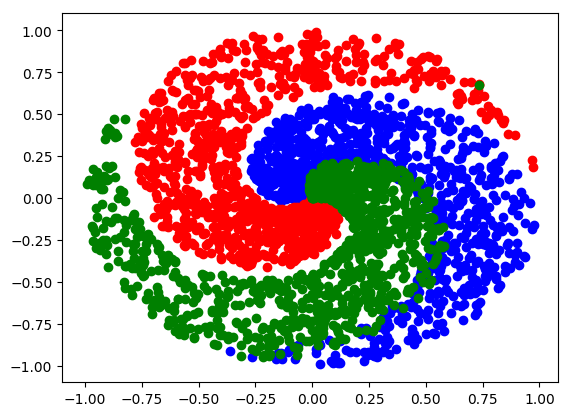

In [139]:
X = zeros(N*C,D)
y = zeros(N*C)
for j=1:C
  ix = (N*(j-1)+1):(N*(j))
    r = linspace(0,1,N) # radius
  t = linspace((j*4),((j+1)*4),N) + rand(N)*2
    X[ix,:] = [reshape(r.*sin(t),size(r.*sin(t))[1],1) reshape(r.*cos(t),size(r.*cos(t))[1],1)]
  y[ix] = j
end

using PyPlot

scatter(X[1:sum(y.==1),1],X[1:sum(y.==1),2],color="blue")
scatter(X[sum(y.==1)+1:sum(y.==1)+1+sum(y.==2),1],X[sum(y.==1)+1:sum(y.==1)+1+sum(y.==2),2],color="red")
scatter(X[end-sum(y.==3):end,1],X[end-sum(y.==3):end,2],color="green")

data = [X y]

Any[,,]
(3,)
1

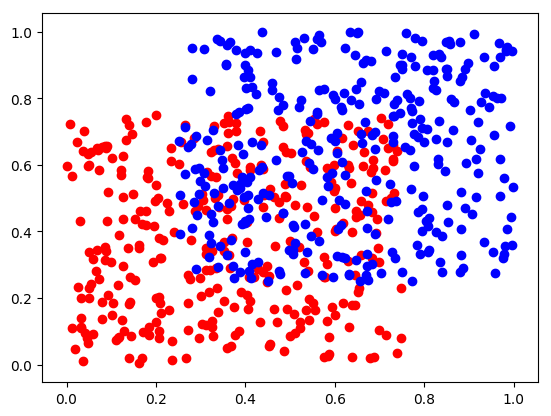

, (333,2)
2, (333,2)
3, (0,2)


In [156]:
using PyPlot
classes = []
for i=1:C
    append!(classes,[Array{Float64}(0,size(data)[2]-1)])
end
println(classes)
for i=1:size(data)[1]
    classes[floor(Int,data[i,end])] = [classes[floor(Int,data[i,end])]; reshape(data[i,1:end-1],1,D)]
#     append!(classes[floor(Int,data[i,end])], data[i,1:end-1]')
end
println(size(classes))
colors = ["red", "blue", "green", "yellow"]
for i=1:C
    print(i)
    print(", ")
    println(size(classes[i]))
    scatter(classes[i][:,1],classes[i][:,2],color=colors[i])
end
show();

Now, we will separate the data into training, validation, and test sets, just as we have done before (hint: you can reuse code).

In [141]:
data = data[shuffle(1:N),:];
p_tr = 0.8; p_vl = 0.1; p_ts = 0.1;
i_tr = floor(Int, N*p_tr); i_vl = floor(Int, i_tr + N*p_vl); i_ts = N;
x_tr = data[1:i_tr,1:end-1]; x_vl = data[i_tr:i_vl,1:end-1]; x_ts = data[i_vl:i_ts,1:end-1];
y_tr = floor(Int,reshape(data[1:i_tr,end],size(x_tr)[1],1)); y_vl = reshape(data[i_tr:i_vl,end],size(x_vl)[1],1); y_ts = reshape(data[i_vl:i_ts,end],size(x_ts)[1],1);

Now, generate the trainable matrix `W` with random numbers centered around zero. What should its dimensions be?

Iterate over each of the elements in the training set to apply the update $W := ~W + ~\alpha~x^T~e_{correct}$ that we derived above. 

The goal is to show that the `W` matrix can be changed to maximize the scores for the few datapoints that you are training it with.

If you are done ahead of everyone else. Can you think of a way to do this without a `for` loop? Implement it. 

In [101]:
l1(a,b) = sum(abs(a-b));

norm(x) = x/sum(x);
function norm_min(x)
    out = x-minimum(x);
    out = norm(out);
    return out;
end

softmax_sum(x) = sum(exp(x))
softmax(x) = exp(x)/sum(exp(x))

function b_e(i,n)
    out = zeros(n);
    out[i] = 1;
    return out;
end;

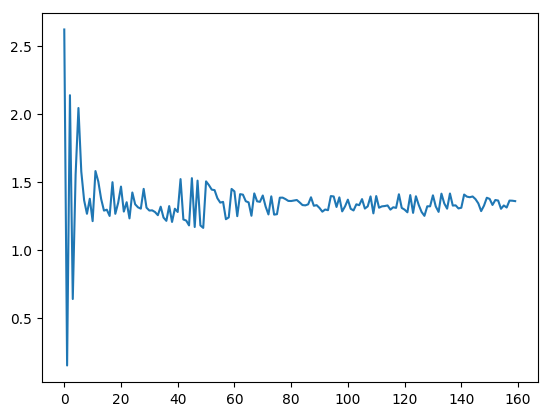

(5,3)
(200,6)
(160,5)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1012102a50>

In [90]:
# generate the W matrix
# [your code here:]
W = 0.2*(rand(D,C)-0.5);

# the W matrix
println(size(W))
println(size(data))
println(size(x_tr))

# iterate over the datapoints in the training set and update the values in the W matrix using the methods we discussed. The reshape function will be helpfull to make sure that the size of your arrays is appropriate for matrix multiplication. Print (or store in a variable to plot later) the objective at each iteration to show that it is moving in the right direction. For now, you can assume that the tunable parameter alpha is equal to 1.
# [your code here:]
alpha = 1
J = zeros(size(x_tr)[1],1);
for i=1:size(x_tr)[1]
    product = *(x_tr[i,:]', W);
    ideal = b_e(y_tr[i],C);
    J[i,1] = l1(ideal', norm_min(product))

    grad = *(x_tr[i,:],ideal')
#     grad = zeros(D,C); # size(W)
#     grad[:,y_tr[i]] = x_tr[i,:]';
    grad *= alpha;
    W += grad;
end

# using PyPlot
plot(J)
    

What did you notice? 

What are limitations that make this a bad way to make a Neural Network Learn?

Highlight observation in a group and be prepared to share with the class. 

A major limitation with the method described so far is the objective function. 

Just think about it! The score could continue growing forever, so the learning process would never end.

We need to come up with a better objective function. 

How could we change our current objective function $J = \text{Maximize} \{\hat{y}_{correct} ~= ~x ~W\}$ to make it have an upper bound?

A simple manipulation would be to change the objective function to be:

$J = \text{Maximize} \bigg\{\hat{y}_{correct}\bigg\}$

Why?

We now use the chain rule to differentiate the expression w.r.t the "trainable" parameters $W$: 

$\frac{\partial J}{\partial W} ~= ~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial W}$

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\hat{y}}{\partial ~x ~W}$

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} $

We already know that $\frac{\partial J}{\partial \hat{y}} = e_{correct}$


To find $\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W}$, let's define $s = ~x ~W$, where $s$ is short for "scores". We will have to find the jacobian matrix:

$$ \frac{\partial ~\hat{y}}{\partial ~x ~W} = ~\frac{\partial ~\frac{s}{\sum_{i}~s}}{\partial ~s} = ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} = ~\begin{bmatrix} \frac{\partial \hat{y}_1}{\partial s_1} & \frac{\partial \hat{y}_1}{\partial s_2} & \dots & \frac{\partial \hat{y}_1}{\partial s_n} \\ \frac{\partial \hat{y}_2}{\partial s_1} & \frac{\partial \hat{y}_2}{\partial s_2}& \dots & \vdots \\ 
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial \hat{y}_n}{\partial s_1} & \frac{\partial \hat{y}_n}{\partial s_2} & \dots & \frac{\partial \hat{y}_n}{\partial s_n} \end{bmatrix}$$

At this point we recognize that the Jacobian matrix $\frac{\partial ~\hat{y}}{\partial ~x ~W}$ will be multiplied by the one-hot vector $e_{correct}$ by the inner product. This will zero out all entries in the Jacobian except: 

$$e_{correct} \frac{\partial ~\hat{y}}{\partial ~x ~W} = ~\begin{bmatrix} \frac{\partial \hat{y}_{correct}}{\partial s_1} & \frac{\partial \hat{y}_{correct}}{\partial s_2} & \dots & \frac{\partial \hat{y}_{correct}}{\partial s_n} \end{bmatrix}$$

And we also observe that:

$$~i = j \rightarrow ~\frac{\partial \hat{y}_i}{\partial s_j} = \frac{\sum_{i\neq j} s}{(\sum s)^2}$$

$$~i \neq j \rightarrow ~\frac{\partial \hat{y}_i}{\partial s_j} = -~\frac{s_i}{(\sum s)^2} = -~\frac{\hat{y}_i}{\sum s}$$

So, to summarize, let's remember:

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} $

But knowing that $~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} = ~\frac{\partial J}{\partial s}$ we can now rewrite everything as:

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T ~\frac{\partial J}{\partial s} $

Modify your previous program so that this time the objective function is: $$J = \text{Maximize} \bigg\{\hat{y}_{correct}\bigg\}$$

And the update step in the direction that maximizes the value of the objective function is:

$W := ~W + ~\alpha~\frac{\partial J}{\partial W}$

This time, initialization of `W` must consist of exclusively of positive numbers. Why?

Experiment with changing the $\alpha$ parameter. Hint: you may have to do more than one pass through the training data in order for "learning" to take place.

Do you foresee major caveats?

In [136]:
W = rand(D,C);
alpha = 0.005
iters = 50
J = zeros(size(x_tr)[1]*iters,C);
for n in 0:iters-1
    new_order = shuffle(1:size(x_tr)[1])
    x_tr = x_tr[new_order,:]
    y_tr = y_tr[new_order,:]
    for i=1:size(x_tr)[1]
        S = *(x_tr[i,:]', W);
        y = norm(S);
        if minimum(y) < 0
            print("\nAAAAAAHHHHH ")
            print(size(x_tr)[1]*n+i)
            print(", ")
            print(y) 
        end
#         println(y_tr[i])
        y_correct = y[y_tr[i]];
        if size(x_tr)[1]*n+i > 1
            J[size(x_tr)[1]*n+i,:] = J[size(x_tr)[1]*n+i-1,:];
        end
        J[size(x_tr)[1]*n+i,y_tr[i]] = y_correct;
        dJ_dS = -y_correct/sum(S) * ones(C);
        dJ_dS[y_tr[i]] = (sum(S)-S[y_tr[i]])/(sum(S)*sum(S));
        dJ_dW = *(x_tr[i,:],dJ_dS');
    #     println(dJ_dW)
        W += alpha*dJ_dW;
    end
end

using PyPlot
for i=1:C
    plot(J[:,i],color=colors[i])
end
axis([0,size(J)[1],0,1]);
show();

LoadError: DimensionMismatch("A has dimensions (1,5) but B has dimensions (2,2)")

Make Julia print the `W` and the `dJ_dW` matrices at every iteration. What did you notice? Could something go wrong?

What makes this a good/bad/better/worse way to make a Neural Network Learn?

Highlight observation in with a group of classmates and be prepared to share with the class. 

The objective function we described previously will return meaningless values when the $W := ~W + ~\alpha~\frac{\partial J}{\partial W}$ update introduces negative values to the $W$ matrix. 

Thankfully, there is are better objective functions to choose. In fact, no one uses the ones we have derived so far (they were just intended as examples to build up intuition from the ground up).

An objective function that is prefered to train Neural Networks is called the $softmax()$ function. 

In spirit $softmax()$ is similar to the objective function $J = \text{Maximize} \bigg\{\hat{y}_{correct}\bigg\}$, but making it bullet-proof to negative numbers.

Before we dive into $softmax()$ though, let's summarize the elements components of a Neural Network we have studied so far.

A simple and generalized Feedforward Neural Netowrk is described by the expression:

$$J = Objective \big\{\hat{y} = ~f(x~W)\big\}$$

* Where $x$ contains a fixed datapoint
* $W$ contains the trainable parameters
* $f()$ is the function setting an upper bound to the scores obtained from the inner product between $x~W$
* and the $Objective \{\}$ determines what we want to maximize (or maybe redude).

Out of the four elements we have been using so far, we can change two to significantly improve the performance of our neural network.

Lets start picking a better function $f()$:
$$softmax(\theta) = \frac{e^\theta}{\sum e^\theta}$$
Here, $\theta \in \mathbf{R^{1xC}}$ is our vector of "scores" for each class.

If you think about it, by raising $e$ to the power of our "scores" vector we make sure that $\hat{y}$ will never have negative values. 

Whenever the "scores" vector contains negative values, raising e to the power of any real number we will obtain a positive value. 

Even $e^{-\infty} = 0$ is a positive number (if you consider $0$ a positive number), but in practive we will never run into this situation.


$$softmax(\theta) = \frac{e^\theta}{\sum e^\theta}$$

Another great important thing about softmax is that, by dividing $\frac{e^\theta}{\sum e^\theta}$ the $\hat{y}$ vector we will only contain numbers between $0$ and $1$, and when they will add up to $1$, always. 

Finally, the function $e^{\theta}$ is a non-linear function and, as you will see, non-linearities are crucial for Neural Networks to have the learning powers that they so well known for. 

So that gets us through one of the things we will adapt. From now on $\hat{y} = f(x~W) =  softmax(x~W) = \frac{e^{x~W}}{\sum e^{x~W}}$

The other thing we will adjust is the Objective function. So far, we can say that the objective function was defined as:

$$Objective\{\hat{y}\} = maximize\{\hat{y}_{correct}\}$$

But there is a better objective function, and in fact it is one that goes very "hand in hand" with $softmax()$.

The objective function we will use is the [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy), which is defined as:

$$J = minimize\{-log(\hat{y}_{correct})\}$$

Intuitively, this function also aims at maximizing the value of $\hat{y}_{correct}$, because if $\hat{y}_{correct}$ were to reach its theoretical maximum possible value (which is $1$, but in practice it will not reach it), the value of $J$ would be $$J = -\log(\hat{y}_{correct}) = -\log(1) = 0$$

On the contrary, when $\hat{y}_{correct}$ contains its theoretically lowest possible value $0$, the result is: $$J = -\log(\hat{y}_{correct}) = -\log(0) = \infty$$

So $\frac{\partial J }{\partial W}$ will now be:

$\frac{\partial J }{\partial W} = ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W}$

Where: 
$$~\frac{\partial J}{\partial \hat{y}}~\frac{\partial \hat{y}}{\partial ~x ~W} = \hat{y} - e_{correct}$$

If you are courious about why this is true, try proving it your self, or visit [this website](http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/)

Modify your previous program so that this time the objective function is: 

$$J = minimize\{-log(\hat{y}_{correct})\}$$

And the update step in the direction that maximizes the value of the objective function is:

$W := ~W - ~\alpha~\frac{\partial J}{\partial W}$

Why do we use a negative sign this time?

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

Experiment with changing the $\alpha$ parameter.

(333,2)3(2,3)


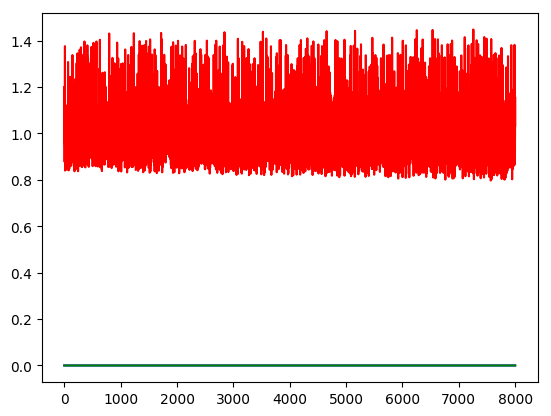

(2,3)
[0.588331 0.0918286 0.149415; 0.831908 0.543107 0.355392]


In [157]:
print(size(classes[2]))
print(C)
W = rand(D,C);
println(size(W))
alpha = 0.00005
iters = 10
J = zeros(size(x_tr)[1]*iters,C);
for n in 0:iters-1
    new_order = shuffle(1:size(x_tr)[1])
    x_tr = x_tr[new_order,:]
    y_tr = y_tr[new_order,:]
    for i=1:size(x_tr)[1]
        S = *(x_tr[i,:]', W);
        y = softmax(S);
        y_correct = y[y_tr[i]];
        if size(x_tr)[1]*n+i > 1
            J[size(x_tr)[1]*n+i,:] = J[size(x_tr)[1]*n+i-1,:];
        end
        J[size(x_tr)[1]*n+i,y_tr[i]] = -log(y_correct);
        dJ_dS = y - b_e(y_tr[i],C)'
        dJ_dW = *(x_tr[i,:]'',dJ_dS);
#         dJ_dW = x_tr[i,:]''*dJ_dS;

#         println(dJ_dS);
    #     println(dJ_dW)
        W -= alpha*dJ_dW;
    end
end
println(size(W))

println(W)
using PyPlot
for i=1:C
    plot(J[:,i],color=colors[i])
end
# axis([0,size(J)[1],0,1]);
show();

What did you notice?

What makes this a good/bad/better/worse way to make a Neural Network Learn?

Highlight observation in with a group of classmates and be prepared to share with the class. 

The last model we developed is known as a "softmax" classifier. 

Softmax, although very similar to a Neural Network, is missing the "hidden layers" that are usually associated with Neural Network architectures.

In the next part we add hidden layers to the Softmax classifier to formally have a Neural Network.